In [4]:
import os
from pathlib import Path

In [8]:
import collections

def contents(p, n=10):
    files = [p for p in p.iterdir()]
    counter = collections.Counter(p.suffix for p in files)
    print(f'Total : {len(files)}')
    print(counter)
    print(f'Up to {n} files : \n{files[:n]}')

In [9]:
DATASETS_DIR = Path(os.environ['DATASETS_DIR'])/'sorghum-id-fgvc-9'
contents(DATASETS_DIR)

Total : 4
Counter({'.csv': 2, '': 2})
Up to 10 files : 
[PosixPath('/datasets/sorghum-id-fgvc-9/train_cultivar_mapping.csv'), PosixPath('/datasets/sorghum-id-fgvc-9/test'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images'), PosixPath('/datasets/sorghum-id-fgvc-9/sample_submission.csv')]


In [10]:
contents((DATASETS_DIR/'train_images'))

Total : 22193
Counter({'.png': 22193})
Up to 10 files : 
[PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-19__13-06-29-651.png'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-03__12-58-24-135.png'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-15__12-32-43-241.png'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-01__11-31-50-488.png'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-02__16-25-06-191.png'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-28__12-52-56-384.png'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-05__12-08-56-198.png'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-13__11-37-46-365.png'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-26__18-27-33-812.png'), PosixPath('/datasets/sorghum-id-fgvc-9/train_images/2017-06-27__11-00-20-408.png')]


In [12]:
contents((DATASETS_DIR/'test'))

Total : 23639
Counter({'.png': 23639})
Up to 10 files : 
[PosixPath('/datasets/sorghum-id-fgvc-9/test/1320211956.png'), PosixPath('/datasets/sorghum-id-fgvc-9/test/1460752465.png'), PosixPath('/datasets/sorghum-id-fgvc-9/test/1437601570.png'), PosixPath('/datasets/sorghum-id-fgvc-9/test/1053653999.png'), PosixPath('/datasets/sorghum-id-fgvc-9/test/937061344.png'), PosixPath('/datasets/sorghum-id-fgvc-9/test/1526324826.png'), PosixPath('/datasets/sorghum-id-fgvc-9/test/1295561477.png'), PosixPath('/datasets/sorghum-id-fgvc-9/test/993820791.png'), PosixPath('/datasets/sorghum-id-fgvc-9/test/1054144892.png'), PosixPath('/datasets/sorghum-id-fgvc-9/test/1911037980.png')]


In [13]:
import pandas as pd

In [14]:
df = pd.read_csv(DATASETS_DIR/'train_cultivar_mapping.csv')
df.head()

,image,cultivar
0,2017-06-16__12-24-20-930.png,PI_257599
1,2017-06-02__16-48-57-866.png,PI_154987
2,2017-06-12__13-18-07-707.png,PI_92270
3,2017-06-22__13-18-06-841.png,PI_152651
4,2017-06-26__12-56-48-642.png,PI_176766


In [15]:
from PIL import Image

def dimensions(s):
    width, height = Image.open(DATASETS_DIR/'train_images'/s['image']).size
    return width, height

In [16]:
df['width'], df['height'] = zip(*df.apply(dimensions, axis=1))

In [17]:
df.head()

,image,cultivar,width,height
0,2017-06-16__12-24-20-930.png,PI_257599,1024,1024
1,2017-06-02__16-48-57-866.png,PI_154987,1024,1024
2,2017-06-12__13-18-07-707.png,PI_92270,1024,1024
3,2017-06-22__13-18-06-841.png,PI_152651,1024,1024
4,2017-06-26__12-56-48-642.png,PI_176766,1024,1024


In [18]:
df[['width', 'height']].value_counts()

width  height
1024   1024      22193
dtype: int64

In [19]:
df['cultivar'].value_counts()

PI_156393    298
PI_155760    282
PI_157030    272
PI_329299    269
PI_152771    262
            ... 
PI_181080    136
PI_152816    136
PI_213900    135
PI_152971    135
PI_257600    134
Name: cultivar, Length: 100, dtype: int64

<AxesSubplot:>

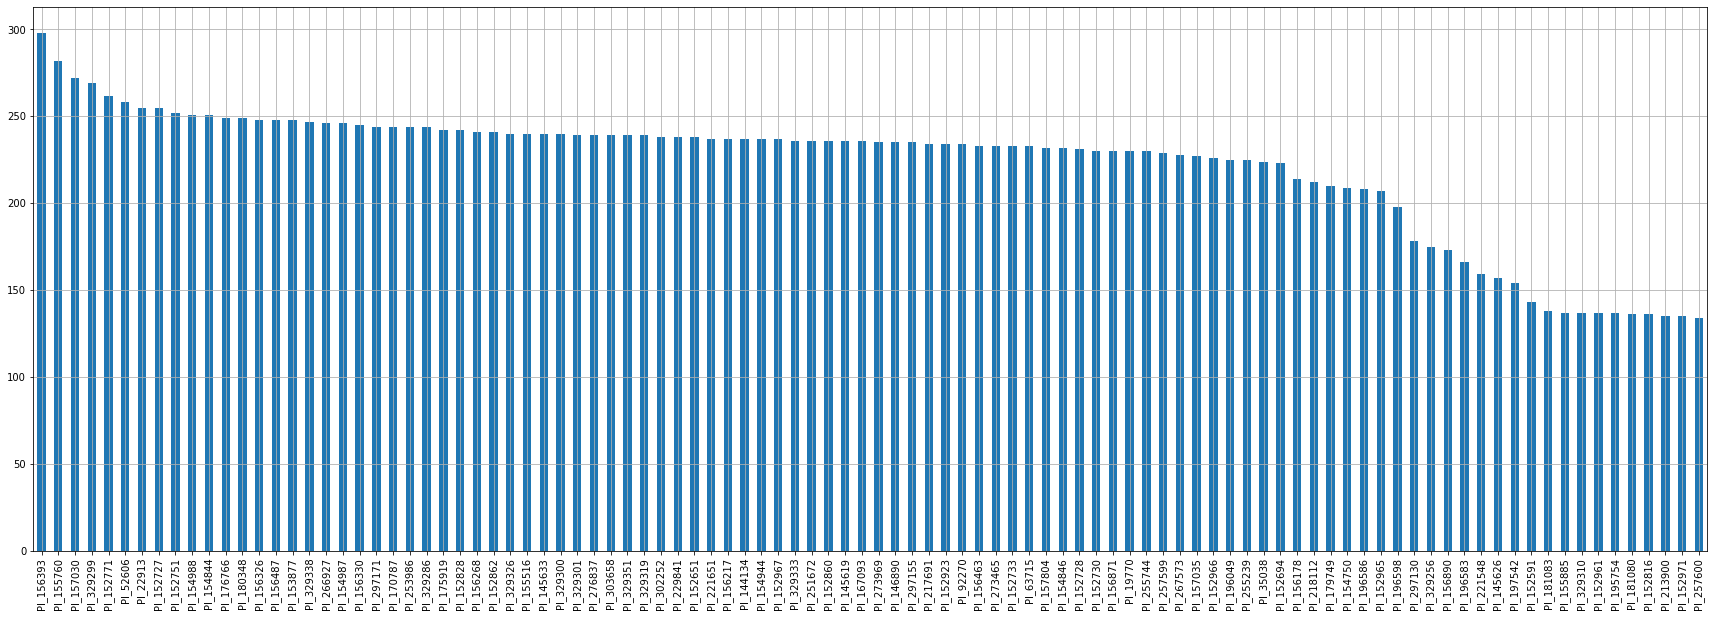

In [20]:
df['cultivar'].value_counts().plot(kind='bar', figsize=(30,10), grid=True)